## Visualization hierarchies

- Visualizations are great to share findings. Unsupervised learning techniques for visualization are:
    - Hierarchial clustering
    - t-SNE
    - PCA

### A hierarchy of groups

- An example of hierarchy clustering in the real world: group of living things. For example, animals -> mammals or reptiles.
- Hierarchical clustering can organize any sort of data into a hierarchy. In our dataset, we will be looking at countries who gave scores performed at the Eurovision 2016.
    - 2D array of scores for each country.
    - Rows are how many points did each country give, columns are songs.
- The result is a tree-like structure called a dendrogram. The dendrogram groups countries into larger and larger clusters, and many of these clusters are immediately recognizable as containing countries that are geographically close to each other, or have close cultural or political ties, or belong to a single language group.

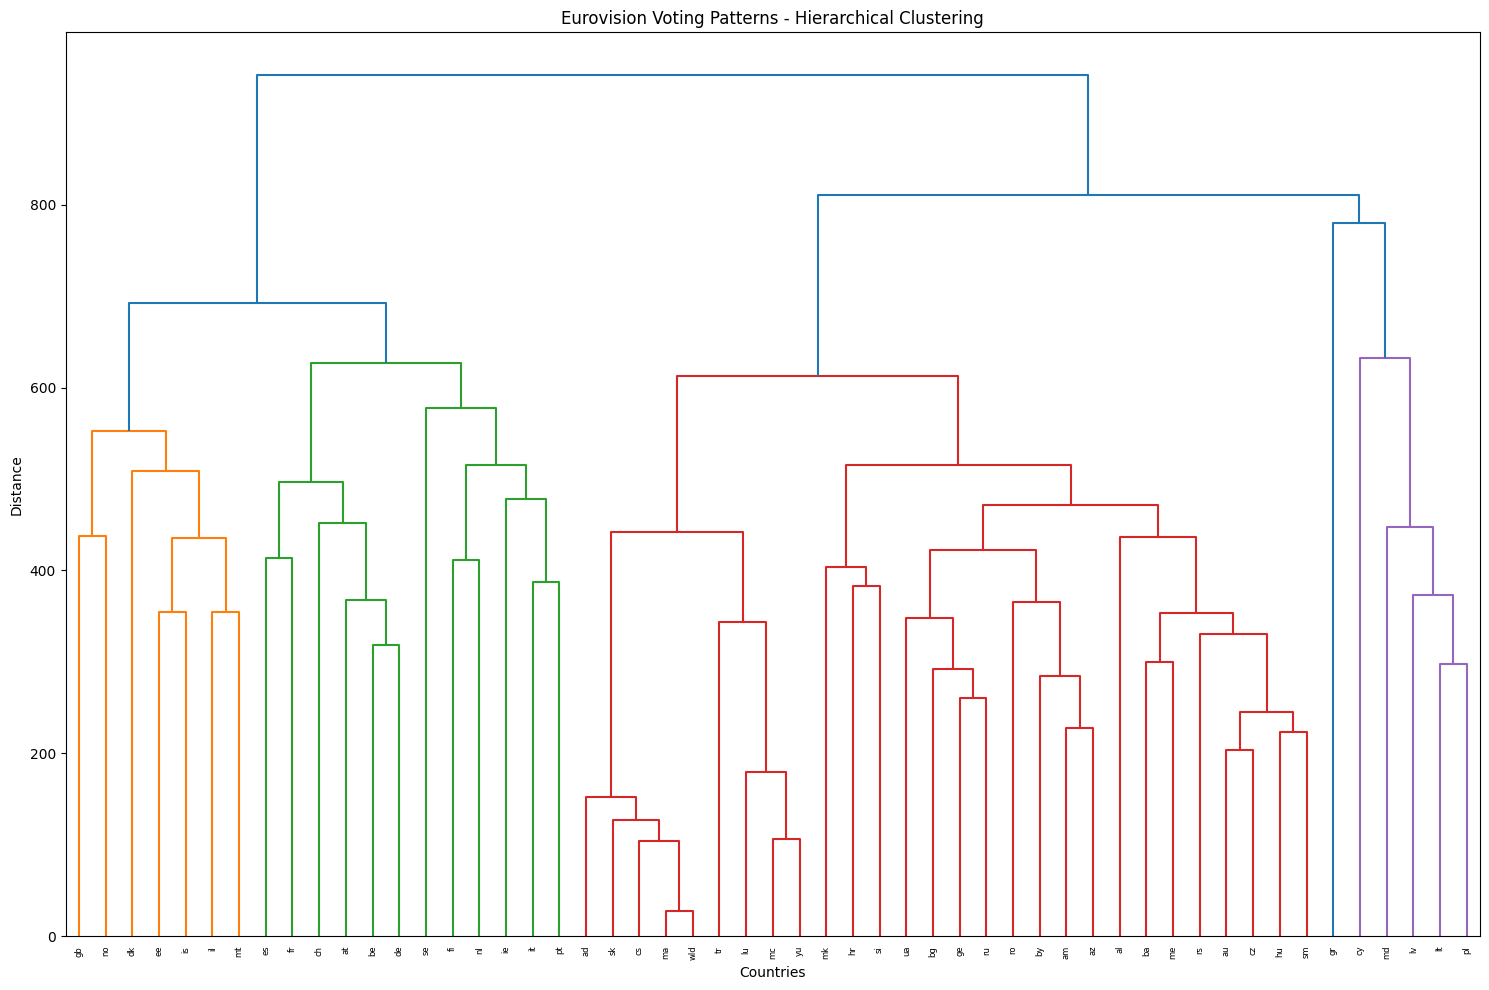


Voting matrix shape: (53, 52)

Sample of voting matrix:
to_country    ad  al  am  at  au
from_country                    
ad             0   6   3   8   0
al             6   0  62  30  59
am             0   8   0  37  13
at             0  70  66   0  30
au             0   0  11  24   0


In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the Eurovision voting data
eurovision = pd.read_csv('votes.csv', index_col=0)

# Create a pivot table of total points between countries
voting_matrix = pd.pivot_table(
    eurovision,
    values='total_points',
    index='from_country',
    columns='to_country',
    aggfunc='sum',
    fill_value=0
)

# Create linkage matrix using Ward's method
linkage_matrix = linkage(voting_matrix, method='complete')

# Create figure and axes
plt.figure(figsize=(15, 10))

# Create dendrogram
dendrogram(linkage_matrix,
           labels=voting_matrix.index,
           leaf_rotation=90)

plt.title('Eurovision Voting Patterns - Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Distance')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print shape of the voting matrix to verify
print("\nVoting matrix shape:", voting_matrix.shape)
print("\nSample of voting matrix:")
print(voting_matrix.iloc[:5, :5])

## How does hierarchical clustering work?

- It works in steps. In the beginning, every country is in its own cluster - so there are as many clusters as there are countries.
- At each step, two closest clusters are merged. This decreases the number of clusters and eventually, there is only one cluster left, which contains all the countries.
- This process is a particular type of hierarchical clustering called Agglomerative Hierarchical Clustering. There is also Divisive Hierarchical Clustering, which is the opposite process.
- Given the `samples` (array of points), and country names, we can perform hierarchical clustering using `linkage` function like above.

## Cluster labels in hierarchical clustering

- Not just a visualization tool
- We can extract the clusters from intermediate steps of a hierarchical clustering. The cluster labels can then be used for futher computations such as cross tabulations, just like the cluster labels in KMeans.
- An intermediate stage in the hierarchical clustering is specified by choosing a **height** on the dendrogram.

## Intermediate clusterings & height on dendrogram

- When you choose a specific height on the dendrogram, you are setting a threshold for how similar clusters need to be in order to be merged together.
- By choosing a height, you are telling the algorithm to stop merging clusters when the distance (height) between them is at least that far apart.
- For example, imagin you have a group of animals: Dogs, Wolves, Cats, Lions, Tigers, Birds
    - To build the dendrogram, start by merging the closest pairs (Dogs & Wolves), and continue to merge until all animals are in one big group.
    - If the height is 15, you are telling the algorithm: ‘Stop merging groups if the distance between them is 15 or more.’
    - This means, at height 15, you might have:
        - One group with Dogs and Wolves (distance less than 15 between them)
        - Another group with Lions and Tigers (distance less than 15 between them)
        - Birds in a separate group because the distance to the others is more than 15

## Distance between clusters

- Defined by a ‘linkage method’
- In our example, we used ‘complete’ linkage, where the distance between two clusters is the maximum of the distances between their samples.
- Different linkage methods are:
    - Ward: Minimizes the variance of the clusters being merged. Tries to keep the clusters as compact as possible. Usually gives more balanced clusters. Good for wanting clusters to be compact.
    - Complete/Maximum: Looks at the farthest points between clusters. Very sensitive to outliers. Creats tight and compact clusters. Good for finding compact, similar-sized clusters when data is clean.
    - Single/Minimum: Looks at the closest points between clusters. Also very sensitive to outliers. Can handle non-elliptical shapes. Often creates long, stretched-out clusters. Good for finding irregularly shaped clusters.
    - Average: Takes the average distance between all points in clusters. More balanced than a single or complete. Less sensitive to outliers. Good for general purpose clustering when you're not sure which linkage method to use.



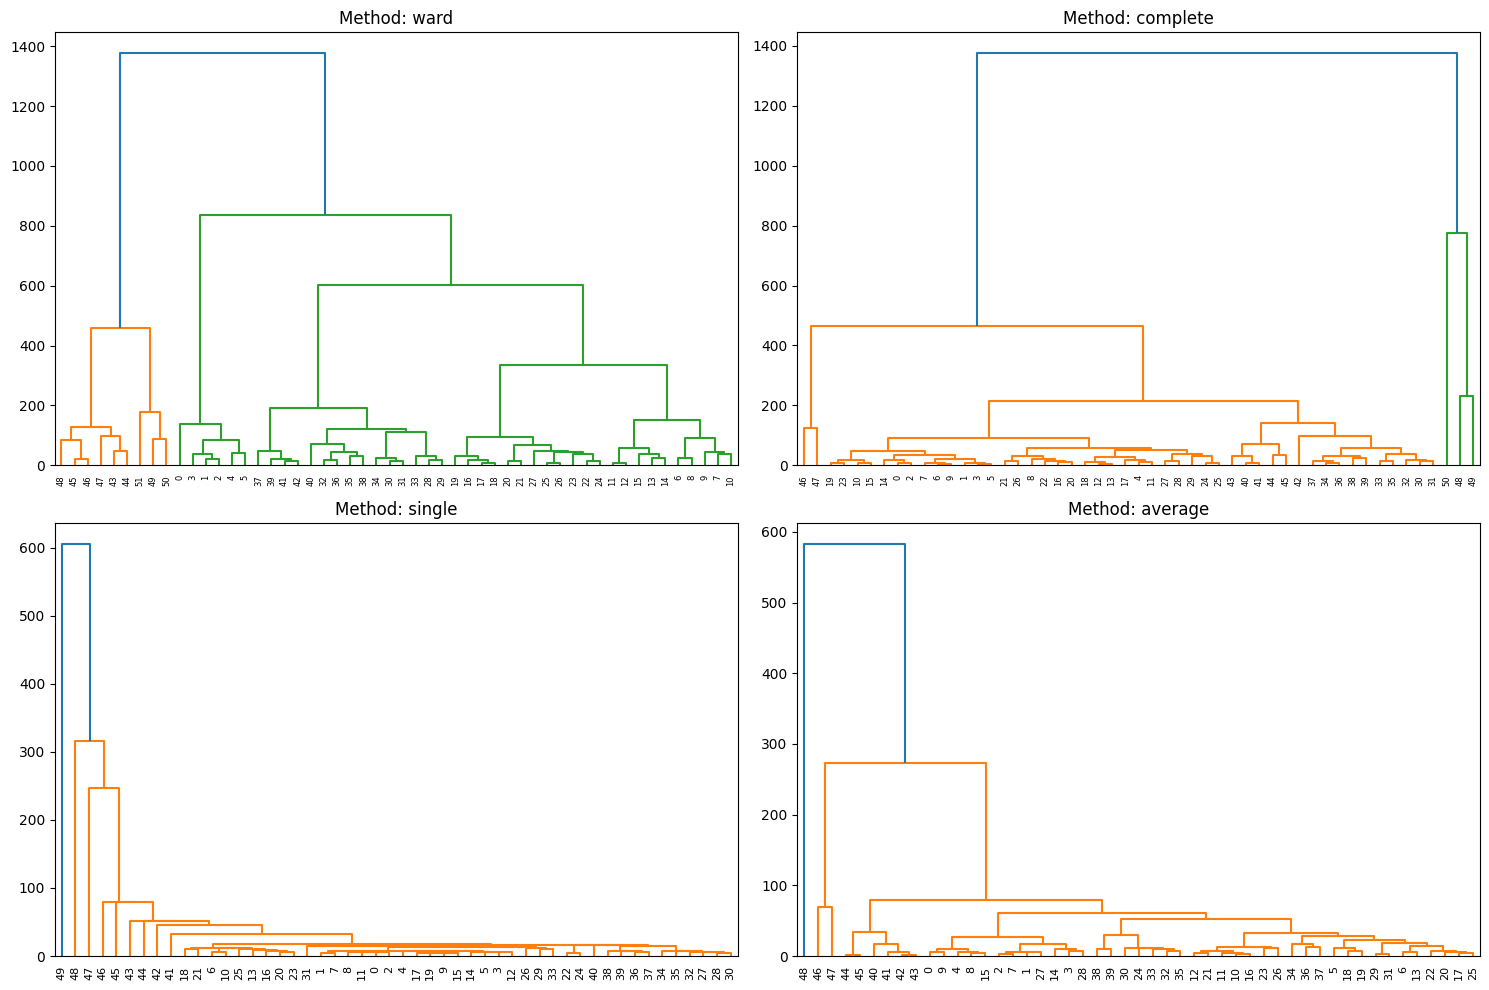

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create dendrograms for different methods
methods = ['ward', 'complete', 'single', 'average']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, method in enumerate(methods):
    ax = axes[i//2, i%2]
    linkage_matrix = linkage(linkage_matrix, method=method)
    dendrogram(linkage_matrix, ax=ax)
    ax.set_title(f'Method: {method}')

plt.tight_layout()
plt.show()

## Hierarchical clustering can be performed on any numerical data

Regardless of whether there are natural, well-defined groups present in the data or not, we can still perform hierarchical clustering. Like in the example below, we look at the dendrogram and the clustering from different linkage methods. And even though the data is not naturally grouped, we can still see that the clusters are formed based on the distance between them. And it is up to us to decide the height at which we want to cut the tree and which method to use.

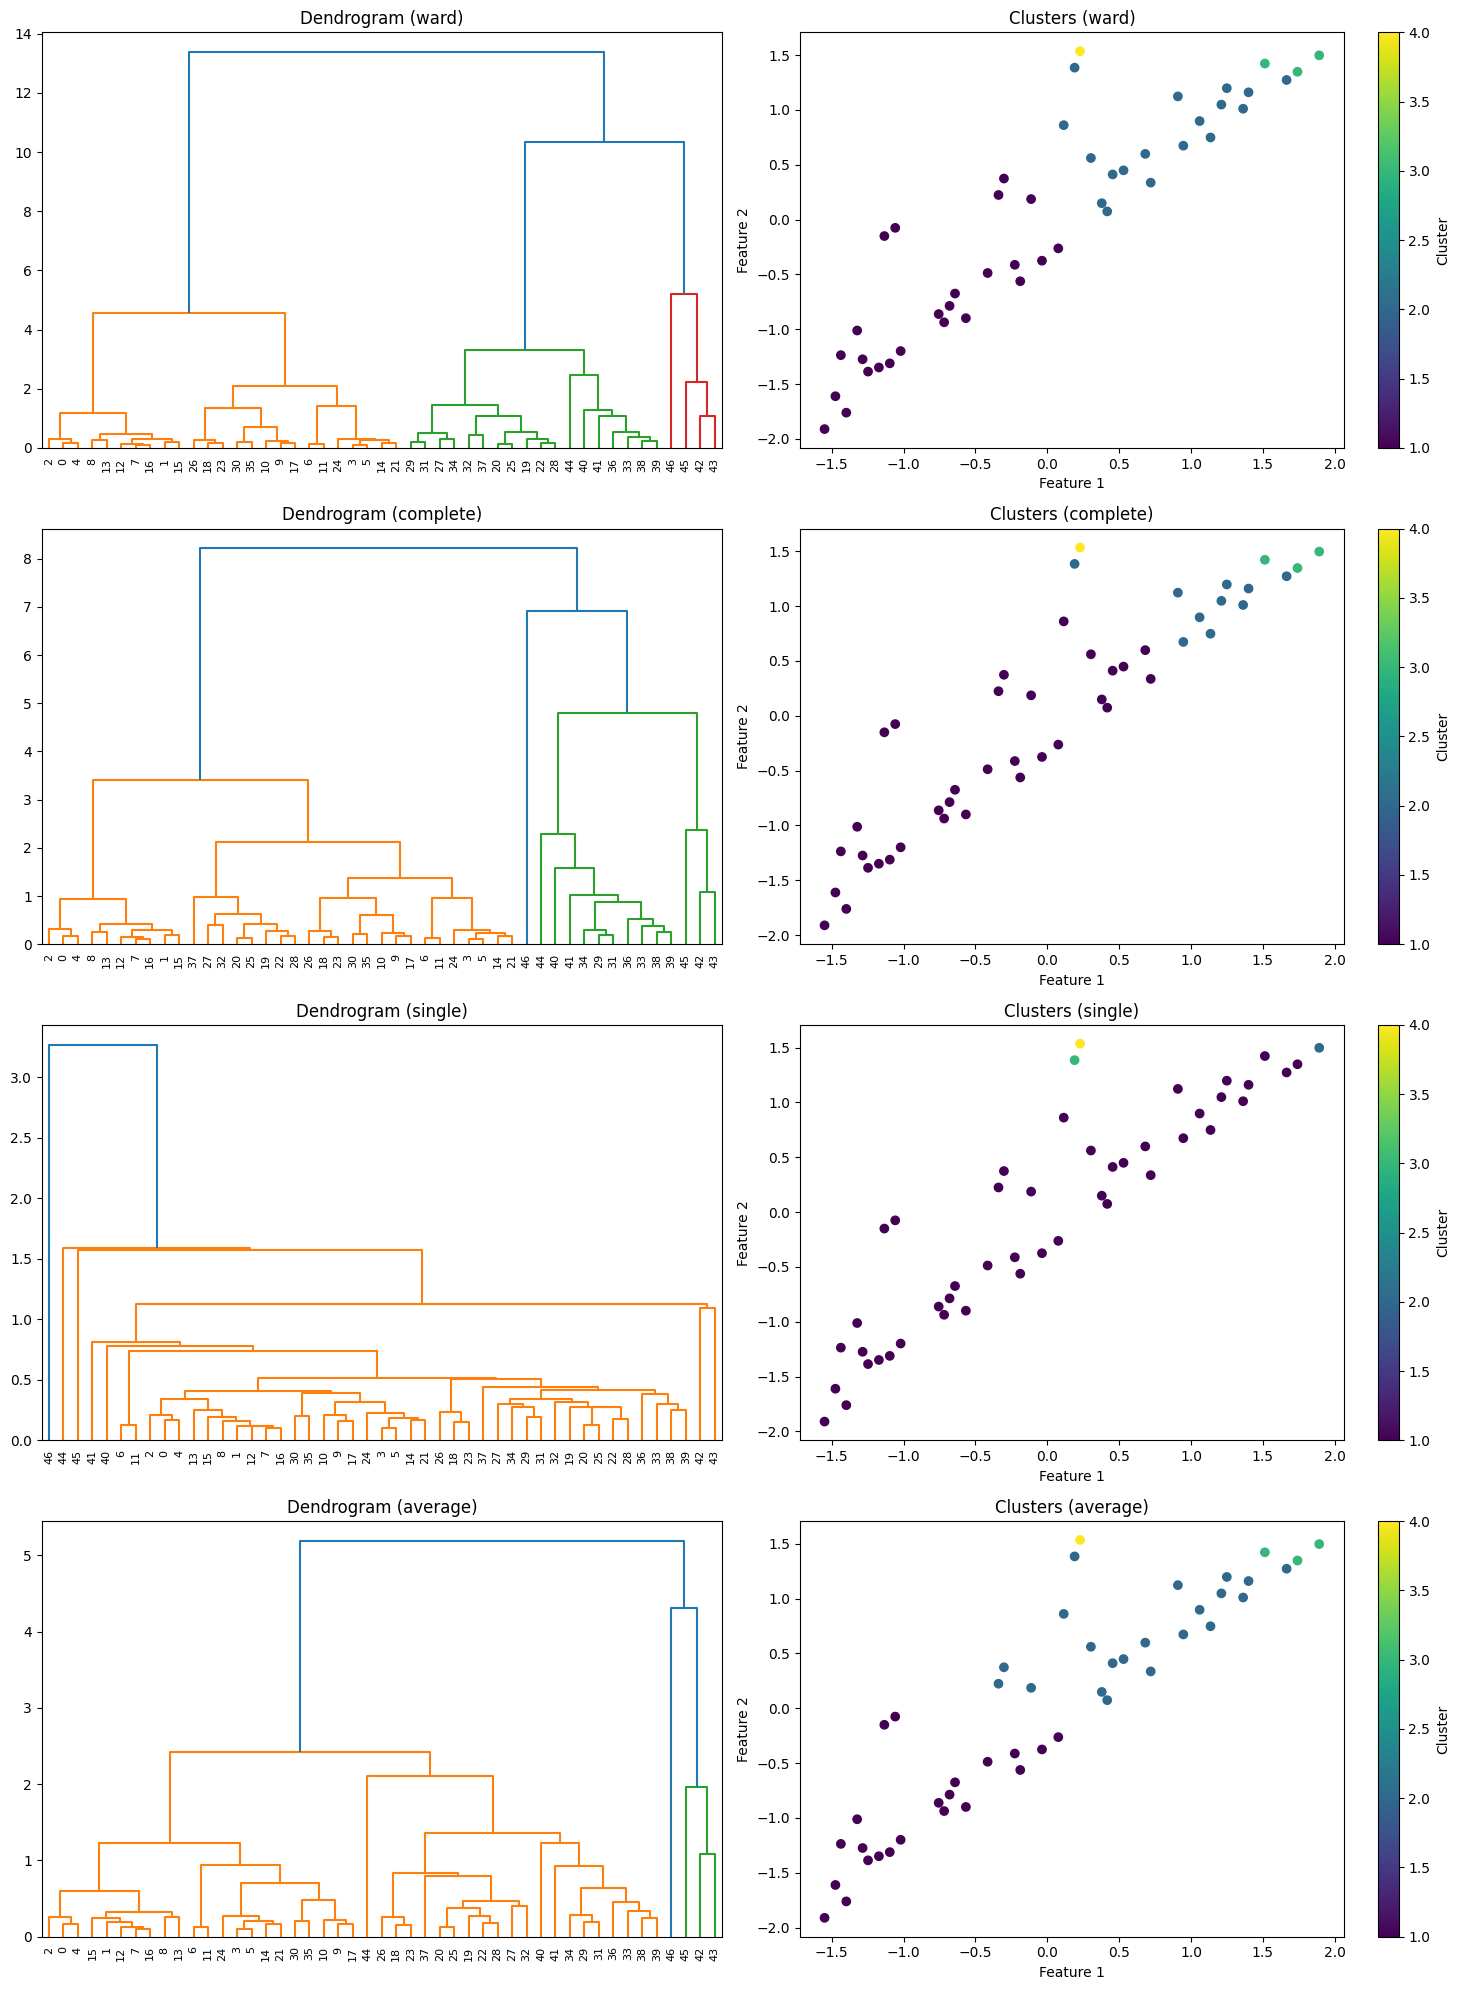


Cluster sizes for ward method:
Cluster 1: 25 samples
Cluster 2: 18 samples
Cluster 3: 3 samples
Cluster 4: 1 samples

Cluster sizes for complete method:
Cluster 1: 33 samples
Cluster 2: 10 samples
Cluster 3: 3 samples
Cluster 4: 1 samples

Cluster sizes for single method:
Cluster 1: 44 samples
Cluster 2: 1 samples
Cluster 3: 1 samples
Cluster 4: 1 samples

Cluster sizes for average method:
Cluster 1: 22 samples
Cluster 2: 21 samples
Cluster 3: 3 samples
Cluster 4: 1 samples


In [6]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(linkage_matrix)

# Create a figure with both dendrogram and scatter plot for each method
methods = ['ward', 'complete', 'single', 'average']
fig, axes = plt.subplots(len(methods), 2, figsize=(15, 20))

for i, method in enumerate(methods):
    # Create linkage matrix
    linkage_matrix = linkage(scaled_data, method=method)
    
    # Plot dendrogram
    ax1 = axes[i, 0]
    dendrogram(linkage_matrix, ax=ax1)
    ax1.set_title(f'Dendrogram ({method})')
    
    # Cut tree to get cluster labels (adjust t parameter as needed)
    labels = fcluster(linkage_matrix, t=4, criterion='maxclust')
    
    # Plot clusters (using first two features for visualization)
    ax2 = axes[i, 1]
    scatter = ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], 
                         c=labels, cmap='viridis')
    ax2.set_title(f'Clusters ({method})')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    plt.colorbar(scatter, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

# Print cluster sizes for each method
for method in methods:
    linkage_matrix = linkage(scaled_data, method=method)
    labels = fcluster(linkage_matrix, t=4, criterion='maxclust')
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\nCluster sizes for {method} method:")
    for cluster, size in zip(unique, counts):
        print(f"Cluster {cluster}: {size} samples")

## Extracting cluster labels

- Use `fcluster` function to extract any cluster labels for any intermediate step of the hierarchical clustering.
- Returns a Numpy array of cluster labels.
- The `t` parameter is the height at which you want to cut the tree.
- The `criterion` parameter is the method used to determine the height at which to cut the tree.
    - `maxclust`: Cuts the tree at height `t`, resulting in exactly `t` clusters.
    - `distance`: Cuts the tree at a height less than or equal to `t`, resulting in as many clusters as there are points.


## fcluster output below

- When we set the height to 500, we get 13 clusters.
- At the lowest height we get a cluster for each country so we got 53.
- At maximum height, we get only one cluster.
- We can use this to decide the height at which we want to cut the tree. This is subjective and depends on the problem we are trying to solve. And by cutting the tree at a certain height, we are able to see the natural groups in the data which helps us in our analysis.

In [4]:
# Create linkage matrix directly from voting_matrix
mergings = linkage(voting_matrix, method='complete')

# Get cluster labels
labels = fcluster(mergings, t=500, criterion='distance')

# Create DataFrame with matching lengths
pairs = pd.DataFrame({
    'labels': labels,  # Now labels should match voting_matrix length
    'countries': voting_matrix.index
})

# Sort and display results
print("Number of clusters:", len(np.unique(labels)))
print("\nCluster assignments:")
print(pairs.sort_values('labels'))

Number of clusters: 13

Cluster assignments:
    labels countries
20       1        gb
39       1        no
26       2        il
27       2        is
37       2        mt
16       2        ee
15       3        dk
3        4        at
19       4        fr
7        4        be
10       4        ch
17       4        es
14       4        de
38       5        nl
18       5        fi
28       6        it
25       6        ie
41       6        pt
45       7        se
51       8       wld
33       8        mc
47       8        sk
49       8        tr
30       8        lu
32       8        ma
0        8        ad
52       8        yu
11       8        cs
46       9        si
36       9        mk
23       9        hr
5       10        az
50      10        ua
1       10        al
48      10        sm
2       10        am
4       10        au
44      10        ru
43      10        rs
42      10        ro
13      10        cz
6       10        ba
24      10        hu
8       10        bg
9       10

## t-SNE for 2D maps

- t-SNE = 't-distributed stochastic neighbor embedding'
- Simply, it maps samples from their high-dimensional space into 2D or 3D space so they can be visualized.
- While some distortions are inevitable, t-SNE does a great job of approximately representing the distances between the samples.

## t-SNE on the iris dataset

- Iris dataset has 4 features so samples are 4D.
- t-SNE maps samples to 2D space.
- t-SNE didn't know that there were different species of iris but if we color the species differently on a scatter plot, we see that t-SNE has kept the species separate.

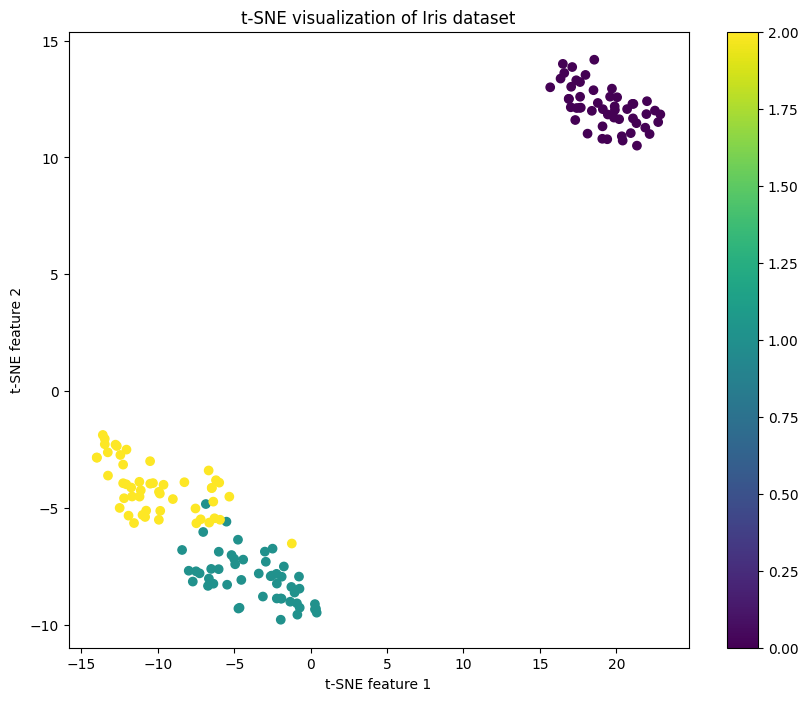

In [5]:
# Import iris dataset
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply t-SNE
tsne = TSNE(learning_rate=100)
X_tsne = tsne.fit_transform(X)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of Iris dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


## t-SNE fit_transform and learning rate

- `fit_transform` method simultaneously fits the model and transforms the data.
- has no separate `fit()` or `transform()` methods, which means you can't extend the map to include new data samples. **Must start over each time!**
- The learning rate makes the use of t-SNE more complicated than some other techniques. You may need to try different rates for different datasets.
- Wrong learning rate choice: points bunch together. Try values between 50 and 200.

## t-SNE plot are different every time

- t-SNE plot don't have interpretable meaning, in fact, they are different every time t-SNE is applied, even on the same dataset!
- For example, for Piedmont wines, 3 runs, 3 different plots.